Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day-1)

Collecting the Data set

In [3]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM500180', 'quandl', start=start, end=end )['Close'])    #HDFC_Bank

In [4]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM500247', 'quandl', start=start, end=end )['Close'])    #Kotak_Mahindra

In [5]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM532174', 'quandl', start=start, end=end )['Close'])    #ICICI_Bank

In [7]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM500325', 'quandl', start=start, end=end )['Close'])    #Axis_Bank

In [12]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM533519', 'quandl', start=start, end=end )['Close'])    #Indusind_Bank

Renaming the close columns

In [13]:
HDFC_Bank = com_df1.rename(columns={'Close':'HDFC_Bank'})
Kotak_Mahindra = com_df2.rename(columns={'Close':'Kotak_Mahindra'})
ICICI_Bank = com_df3.rename(columns={'Close':'ICICI_Bank'})
AXIS_Bank = com_df4.rename(columns={'Close':'AXIS_Bank'})
Indusind_Bank = com_df5.rename(columns={'Close':'Indusind_Bank'})

Joinig all the data frames

In [14]:
close_df = (((HDFC_Bank.join(Kotak_Mahindra, how="outer")).join(ICICI_Bank, how="outer")).join(AXIS_Bank, how="outer")).join(Indusind_Bank,how="outer")

In [15]:
close_df

,HDFC_Bank,Kotak_Mahindra,ICICI_Bank,AXIS_Bank,Indusind_Bank
Date,,,,,
2018-08-17,2077.25,1262.95,340.05,1203.45,181.65
2018-08-16,2075.60,1244.90,334.45,1200.20,176.25
2018-08-14,2089.15,1291.60,332.30,1210.95,179.05
2018-08-13,2090.65,1287.55,325.25,1187.15,174.55
2018-08-10,2115.00,1286.80,328.15,1204.00,177.30
2018-08-09,2118.65,1277.70,332.95,1217.95,180.75
2018-08-08,2136.85,1290.35,318.20,1217.25,174.80
2018-08-07,2132.15,1283.50,313.10,1183.55,176.40
2018-08-06,2115.20,1282.35,315.05,1191.50,179.90


In [16]:
import seaborn as sns
sns.set_style('whitegrid')

In [17]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,HDFC_Bank,Kotak_Mahindra,ICICI_Bank,AXIS_Bank,Indusind_Bank
Date,,,,,
2018-08-17,NaN,NaN,NaN,NaN,NaN
2018-08-16,-0.000794,-0.014292,-0.016468,-0.002701,-0.029727
2018-08-14,0.006528,0.037513,-0.006428,0.008957,0.015887
2018-08-13,0.000718,-0.003136,-0.021216,-0.019654,-0.025133
2018-08-10,0.011647,-0.000583,0.008916,0.014194,0.015755


# Pair Plotting

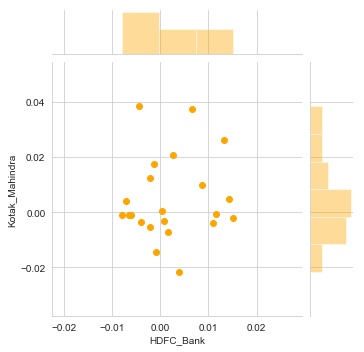

In [18]:
sns.jointplot('HDFC_Bank','Kotak_Mahindra',rets, kind='scatter',height=5, color='orange')

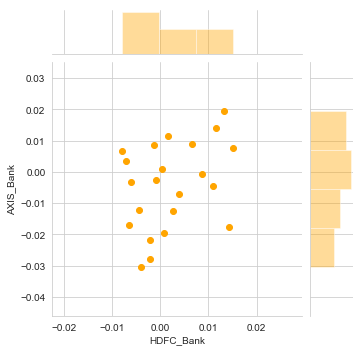

In [19]:
sns.jointplot('HDFC_Bank','AXIS_Bank',rets, kind='scatter',height=5, color='orange')

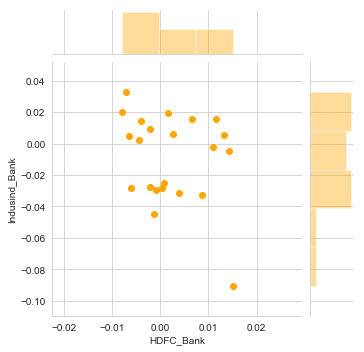

In [20]:
sns.jointplot('HDFC_Bank','Indusind_Bank',rets, kind='scatter',height=5, color='orange')

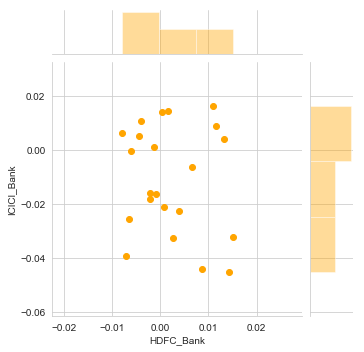

In [21]:
sns.jointplot('HDFC_Bank','ICICI_Bank',rets, kind='scatter',height=5, color='orange')

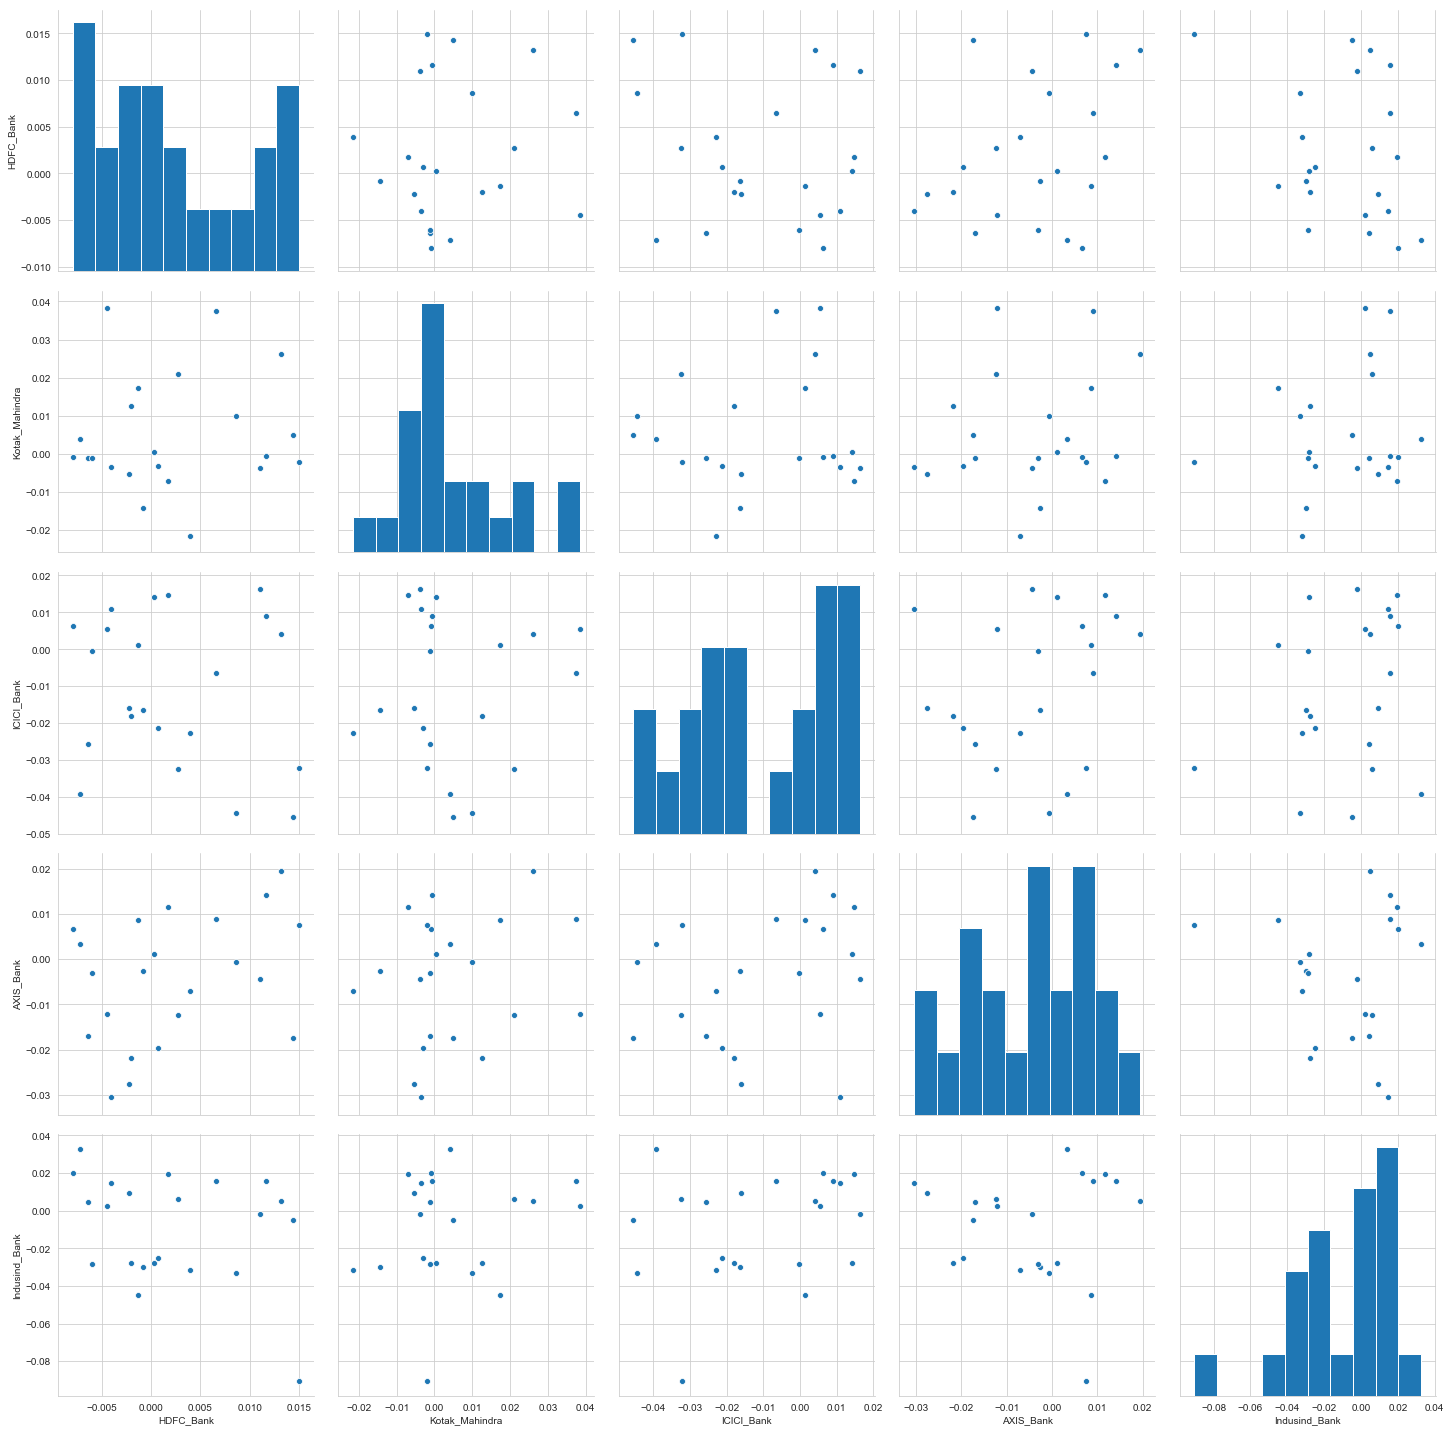

In [22]:
sns.pairplot(rets.dropna(),height=4)
pt.savefig("PairPlotting")

# Correlation Matrix

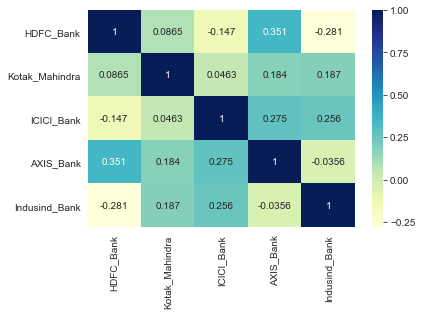

In [23]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

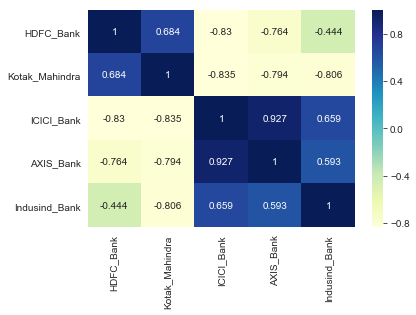

In [24]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

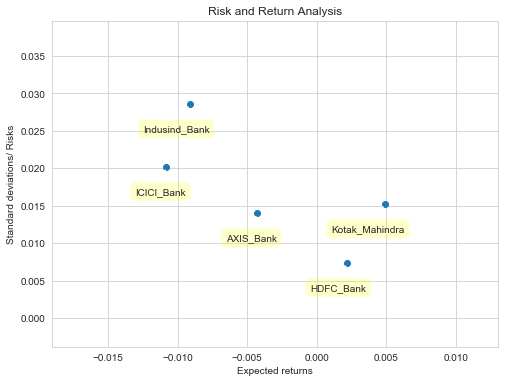

In [25]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

pt.savefig("5 Risk and Return Analysis.png")


<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [26]:
import numpy as np
import statsmodels.api as sm
X=close_df[['Kotak_Mahindra','ICICI_Bank','AXIS_Bank','Indusind_Bank']]
X = sm.add_constant(X)
y=close_df['HDFC_Bank']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HDFC_Bank   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     11.38
Date:                Sat, 18 Aug 2018   Prob (F-statistic):           8.77e-05
Time:                        02:51:35   Log-Likelihood:                -101.89
No. Observations:                  23   AIC:                             213.8
Df Residuals:                      18   BIC:                             219.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1997.0722    629.459      3.173      0.005     674.628    3319.517
Kotak_Mahindra     0.2192      0.304      0.722      0.480      -0.419       0.857
ICICI_Bank        -1.4213      0.568     -2.504      0.022      -2.614      -0.229
AXIS_Bank          0.0958      0.303      0.316      0.756      -0.541       0.733
Indusind_Bank      1.0202      0.782      1.305      0.208      -0.622       2.663
==============================================================================
Omnibus:                        2.474   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.096
Skew:                           0.691   Prob(JB):                        0.351
Kurtosis:                       2.475   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

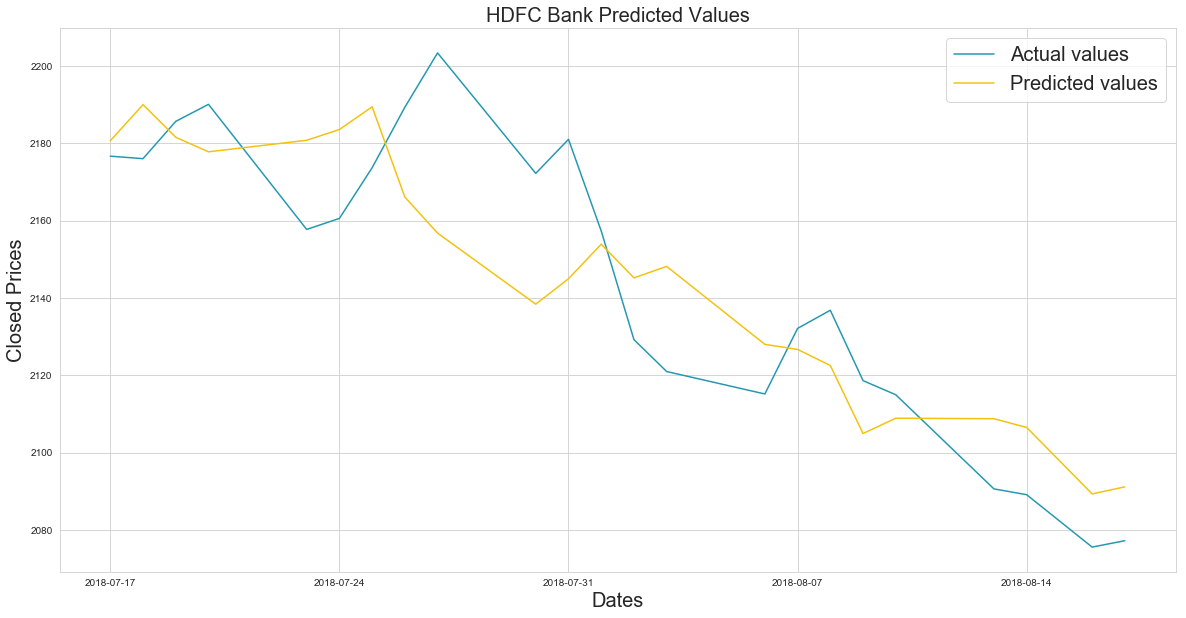

In [27]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('HDFC Bank Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})
pt.savefig("6 HDFC Bank Predicted Valeus")